<a href="https://colab.research.google.com/github/og-hayden/ai-ml/blob/main/PyTorch_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [354]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

In [355]:
 X, y = load_breast_cancer(as_frame=True, return_X_y=True)

In [356]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [357]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [358]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [359]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

X_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [360]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42, shuffle=True)

In [361]:
X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()

In [362]:
X_train, X_test = torch.tensor(X_train).to(device).type(torch.float), torch.tensor(X_test).to(device).type(torch.float)
y_train, y_test = torch.tensor(y_train).to(device).type(torch.float), torch.tensor(y_test).to(device).type(torch.float)

In [363]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.sequential_layer_stack = nn.Sequential(
        nn.Linear(30, 64),
        nn.ReLU(),
        # nn.Linear(128, 256),
        # nn.ReLU(),
        # nn.Linear(256, 128),
        # nn.ReLU(),
        # nn.Linear(128, 64),
        # nn.ReLU(),
        nn.Linear(64, 1),
        nn.Sigmoid() # converts logits into prediction probabilities
    )
  def forward(self, x):
    return self.sequential_layer_stack(x)

In [364]:
model = Model().to(device)

In [365]:
# Making random predictions to ensure model is working
model.eval()
with torch.inference_mode():
  y_pred_probs = model(X_train[:5]).squeeze()
y_pred_probs

tensor([0.3750, 0.5106, 0.4475, 0.4373, 0.4844], device='cuda:0')

In [366]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.0001)

In [367]:
from torch.utils.data.dataloader import T
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [368]:
epochs = 1000

train_history = {}
test_history = {}

patience = 32
num_unimproved_epochs = 0
best_loss = float('inf')

for epoch in range(epochs):
  model.train()
  for batch_X, batch_y in train_loader:
    optimizer.zero_grad()
    pred_probs = model(batch_X).squeeze()
    loss = loss_fn(pred_probs, batch_y)
    loss.backward()
    optimizer.step()
  train_history[epoch] = loss.item()

  model.eval()
  with torch.inference_mode():
    pred_probs = model(X_test).squeeze()
  test_loss = loss_fn(pred_probs, y_test)
  test_history[epoch] = test_loss.item()


  if (epoch + 1) % 10 == 0:
    print(f"Epoch {epoch + 1} | Training loss: {loss} | Test loss: {test_loss}")

  if test_loss < best_loss:
    num_unimproved_epochs = 0
    best_loss = test_loss
    best_params = model.state_dict()
  else:
    num_unimproved_epochs += 1

  if num_unimproved_epochs > patience:
    print(f"Training stopped at epoch {epoch + 1}.")
    model.load_state_dict(best_params)
    break

Epoch 10 | Training loss: 0.5090836882591248 | Test loss: 0.3992727994918823
Epoch 20 | Training loss: 0.38239842653274536 | Test loss: 0.2340814173221588
Epoch 30 | Training loss: 0.09549549221992493 | Test loss: 0.15654607117176056
Epoch 40 | Training loss: 0.05310440436005592 | Test loss: 0.11785901337862015
Epoch 50 | Training loss: 0.07520513236522675 | Test loss: 0.09595293551683426
Epoch 60 | Training loss: 0.05466551333665848 | Test loss: 0.08270932734012604
Epoch 70 | Training loss: 0.04620399698615074 | Test loss: 0.07441326975822449
Epoch 80 | Training loss: 0.07915323227643967 | Test loss: 0.06846797466278076
Epoch 90 | Training loss: 0.006092636380344629 | Test loss: 0.06442121416330338
Epoch 100 | Training loss: 0.006233460735529661 | Test loss: 0.06171734258532524
Epoch 110 | Training loss: 0.00861391145735979 | Test loss: 0.05963641032576561
Epoch 120 | Training loss: 0.04030606895685196 | Test loss: 0.05832657963037491
Epoch 130 | Training loss: 0.012941259890794754 | 

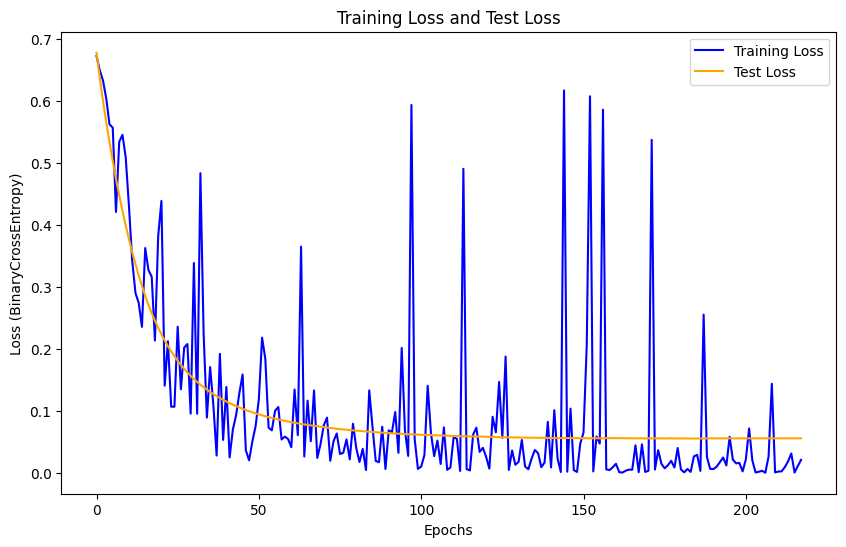

In [369]:
epochs = list(train_history.keys())
losses = list(train_history.values())

test_epochs = list(test_history.keys())
test_losses = list(test_history.values())

plt.figure(figsize=(10, 6))
plt.title("Training Loss and Test Loss")
plt.plot(epochs, losses, color='blue', label="Training Loss")
plt.plot(test_epochs, test_losses, color='orange', label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (BinaryCrossEntropy)")
plt.legend()
plt.show()

In [376]:
with torch.inference_mode():
  y_preds = model(X_test[:50]).squeeze().to("cpu").numpy()
  y_actual = y_test[:50].to("cpu").numpy()

In [377]:
y_preds = np.around(y_preds)
y_preds[:10]

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1.], dtype=float32)

In [380]:
for i in range(10):
  print(f"Pred: {int(y_preds[i])} | Actual: {int(y_test[i])}")

Pred: 1 | Actual: 1
Pred: 0 | Actual: 0
Pred: 0 | Actual: 0
Pred: 1 | Actual: 1
Pred: 1 | Actual: 1
Pred: 0 | Actual: 0
Pred: 0 | Actual: 0
Pred: 0 | Actual: 0
Pred: 1 | Actual: 1
Pred: 1 | Actual: 1
